L1 regression = lasso
l2 regresison = ridge

now lets learn about classficiation models

---------

# dataset

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
import pandas as pd
dataframe = pd.DataFrame(data.data , columns = data.feature_names)
dataframe[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


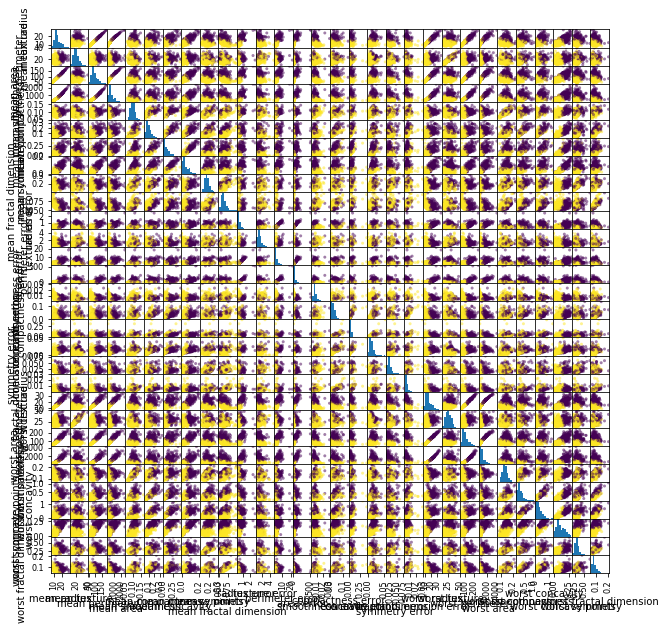

In [17]:
pd.plotting.scatter_matrix(dataframe , c = data.target , figsize =(10 , 10));

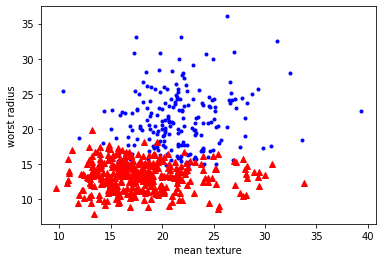

In [78]:
feature1 = data.data[: ,20];
feature2 = data.data[: ,1];
from matplotlib import pyplot as plt
plt.plot(feature2[data.target == 0] ,feature1[data.target == 0],  '.b' );
plt.plot(feature2[data.target == 1] ,feature1[data.target == 1], '^r' );
plt.ylabel(data.feature_names[20]);
plt.xlabel(data.feature_names[1]);

# models

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
x = np.concatenate((feature1.reshape(feature1.shape[0],1) , feature2.reshape(feature1.shape[0],1)) , axis = 1)
x_train , x_test, y_train , y_test = train_test_split(x , data.target, test_size = 0.2)

In [268]:
def  plot_line(x , y , model,title="Title"):
    coefs = model.coef_;
    slope = -coefs[0,0]/coefs[0,1];
    intercept = -model.intercept_/coefs[0,1];
    x_line = np.arange(x[:,0].min() , x[:,0].max());
    y_line = intercept + slope * x_line;
    plt.figure(figsize=(20,7))
    plt.plot(x[:,0][y==0], x[:,1][y==0], '^');
    plt.plot(x[:,0][y==1], x[:,1][y==1], '^' );
    plt.plot( x_line , y_line , '--');
    plt.ylim((x[:,1].min() , x[:,1].max()))
    plt.title(title)

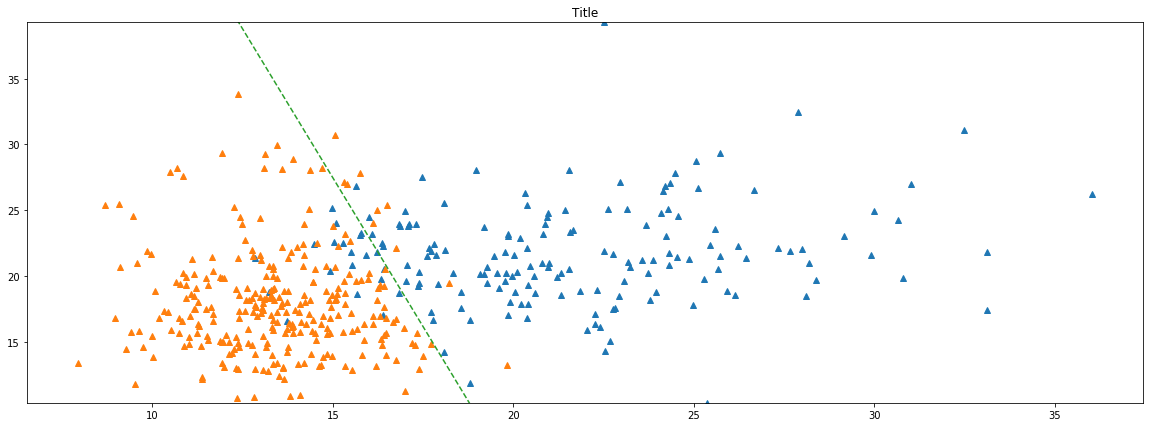

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
sc = SVC(gamma = 'auto').fit(x_train , y_train);
lr = LogisticRegression(solver='lbfgs').fit(x_train , y_train);
plot_line(x_train , y_train , lr);


In [270]:
print("test accuracy - LR: {:.2f}".format(lr.score(x_test ,y_test)));
print("train accuracy - LR: {:.2f}".format(lr.score(x_train ,y_train)));
print("test accuracy in SVM: {:.2f}".format(sc.score(x_test ,y_test)));
print("train accuracy in SVM: {:.2f}".format(sc.score(x_train ,y_train)));

test accuracy - LR: 0.92
train accuracy - LR: 0.93
test accuracy in SVM: 0.94
train accuracy in SVM: 0.95


C:0.0001
 test accuracy: 0.728 , train accuracy: 0.734
C:0.001
 test accuracy: 0.868 , train accuracy: 0.903
C:10
 test accuracy: 0.921 , train accuracy: 0.934


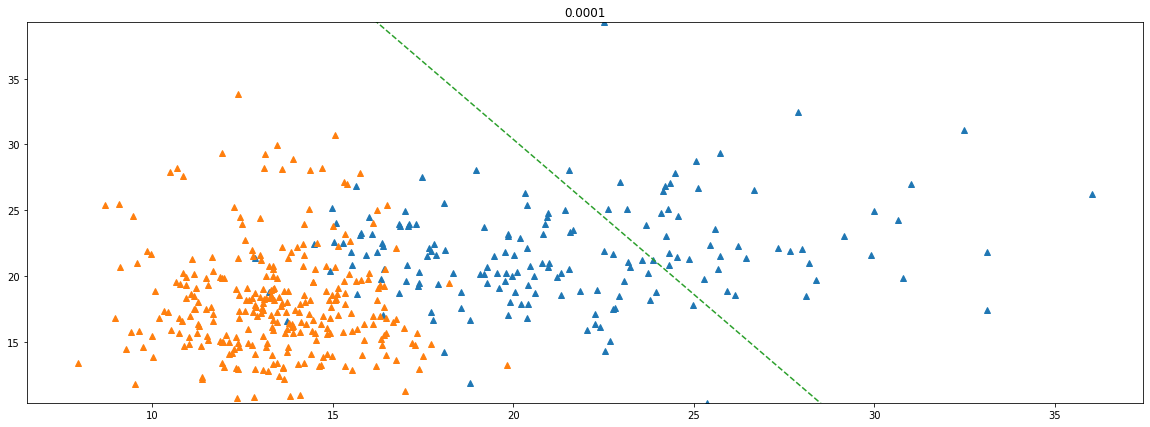

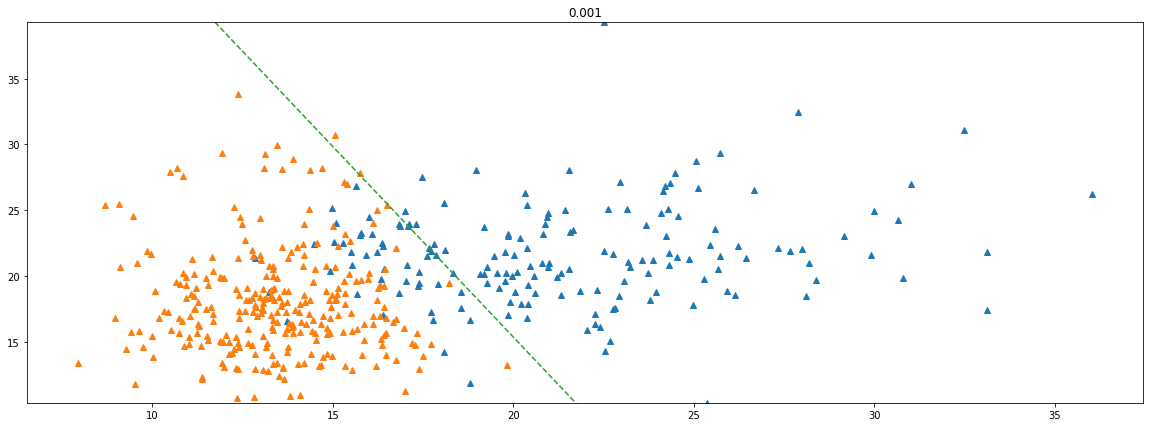

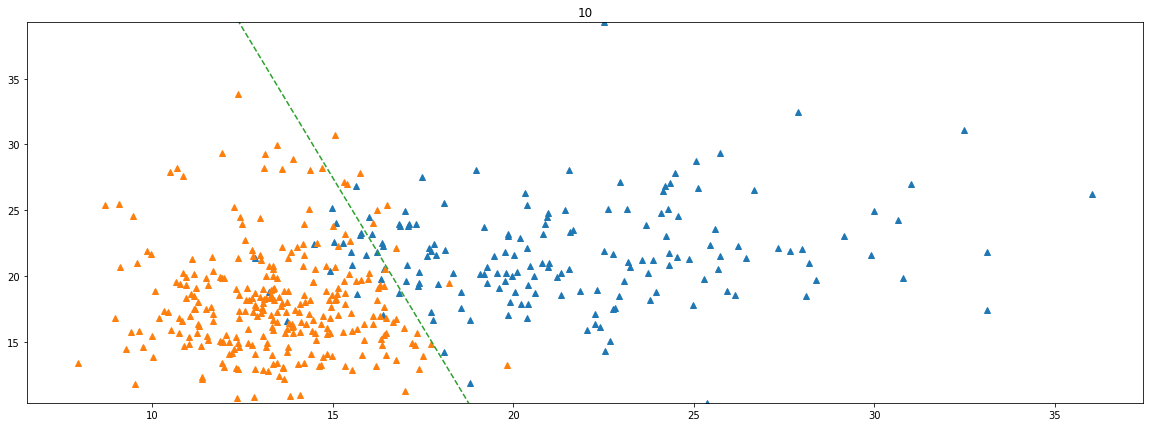

In [286]:
parameter_c = [0.0001 , 0.001 , 10];
for par in parameter_c :
    model = LogisticRegression(solver = 'lbfgs',C = par).fit(x_train , y_train);
    plot_line(x_train , y_train ,model,par)
    print("C:{}\n test accuracy: {:.3f} , train accuracy: {:.3f}".format(par , model.score(x_test , y_test), model.score(x_train , y_train)));

Good Luck
-----------------

-----------------------------------------

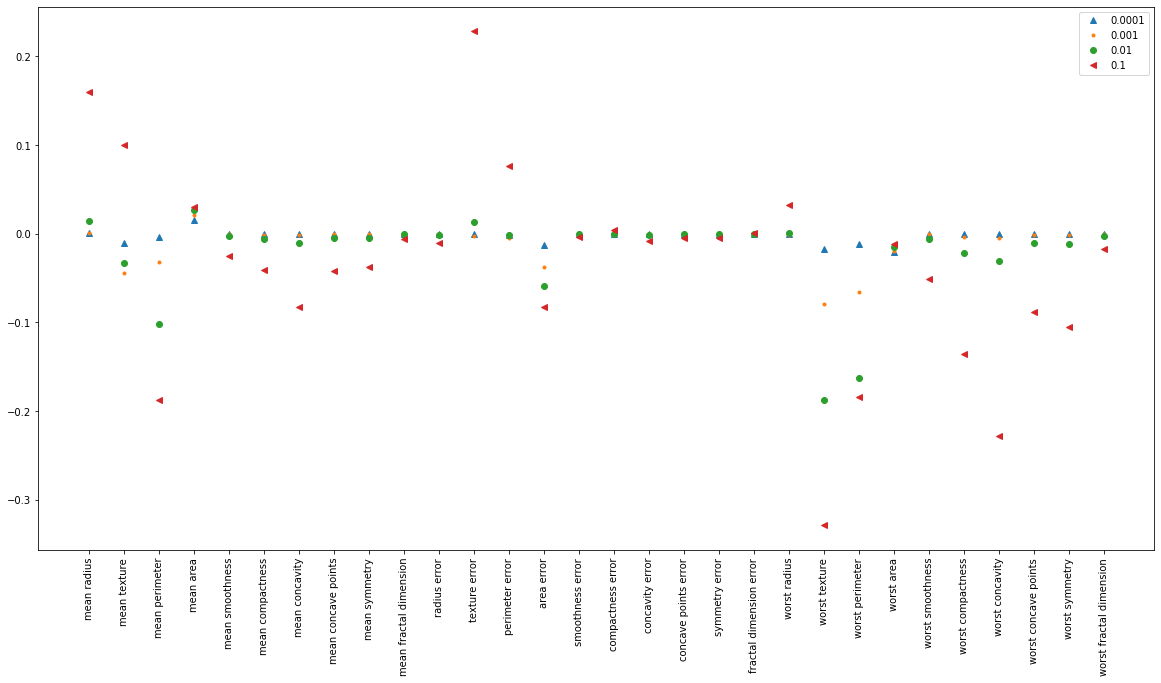

In [315]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer();

from sklearn.linear_model import LogisticRegression
coefs = [];
params=[0.0001 , 0.001 , 0.01 , 0.1];
for par in params:
    model = LogisticRegression( solver = 'lbfgs',C=par,max_iter=10000).fit(data.data , data.target);
    coefs.append(model.coef_)
    
plt.figure(figsize=(20,10))
plt.plot(data.feature_names,coefs[0].T ,'^');
plt.plot(data.feature_names,coefs[1].T ,'.');
plt.plot(data.feature_names,coefs[2].T ,'o');
plt.plot(data.feature_names,coefs[3].T ,'<');
plt.xticks(rotation = 90);
plt.legend(params);